In [1]:
import numpy as np  # importing numpy
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100,1)   # normally distributed array with dimension (100,1)

In [3]:
y = 4 + 3*X + np.random.randn(100,1) 
#               Gaussian Noise

In [4]:
import matplotlib.pyplot as plt

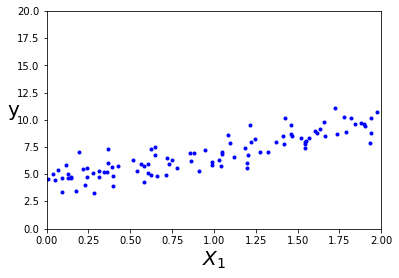

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.show()

In [6]:
X_b = np.c_[np.ones((100,1)),X]

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [9]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [10]:
# Add x0 = 1 to each instance

X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [11]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

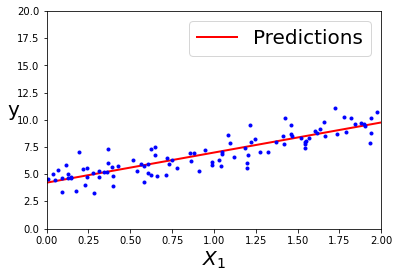

In [12]:
plt.plot(X_new, y_predict, 'r-', linewidth = 2, label='Predictions')
plt.plot(X,y, 'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [15]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Batch gradient Descent

In [63]:
eta = 0.1       # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
print(theta)
batch_gd_x = []
batch_gd_y = []
for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta*gradients
    batch_gd_x.append(theta[0])
    batch_gd_y.append(theta[1])
print('after calculations', theta)

[[-0.96848365]
 [-1.38176919]]
after calculations [[4.21509616]
 [2.77011339]]


In [51]:
theta

array([[4.06338598],
       [2.90406523]])

In [52]:
def gradient_descent_plot(eta,n_iterations,theta):
    m = len(X_b)
    for iterations in range(n_iterations):
        if iterations<10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iterations>0 else 'r--'
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
        theta = theta - eta*gradients
    plt.plot(X,y,'b.')
    plt.xlabel('$X_1$', fontsize = 20)
    plt.ylabel('y', rotation = 0 ,fontsize = 20)
    plt.title(f'n{eta}')
    plt.axis([0,2,0,20])
    

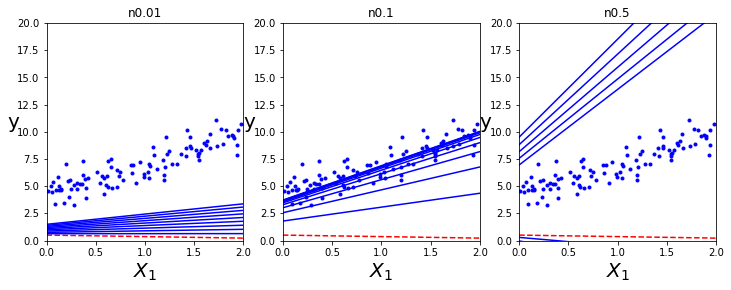

In [53]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(12,4))
plt.subplot(131);gradient_descent_plot(0.01,100,theta)
plt.subplot(132);gradient_descent_plot(0.1,100,theta)
plt.subplot(133);gradient_descent_plot(0.5,100,theta)
plt.show()

In [54]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(eta0 = 0.1, random_state = 42)

In [55]:
sgd_reg.fit(X,y)

SGDRegressor(eta0=0.1, random_state=42)

In [56]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24438563]), array([2.8242988]))

In [57]:
sgd_reg.n_iter_

11

In [58]:
y_predict_sgd = sgd_reg.predict(X_new)
y_predict_sgd

array([4.24438563, 9.89298323])

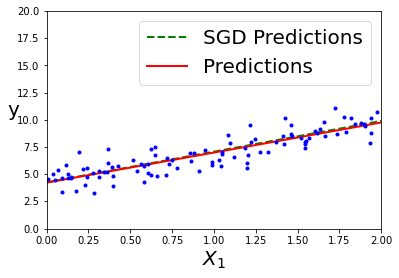

In [59]:
plt.plot(X_new, y_predict_sgd, 'g--', linewidth = 2, label='SGD Predictions')
plt.plot(X_new, y_predict, 'r-', linewidth = 2, label='Predictions')
plt.plot(X,y, 'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

# Stochastic Gradient Descent

No handles with labels found to put in legend.


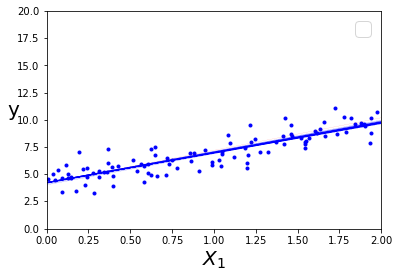

time taken: 0.6345610618591309


array([[4.19154824],
       [2.77125703]])

In [60]:
import time
t0, t1 = 5,50                   # t0 and t1 are hyperparameters
m=100                           # number of rows in our dataset
def learning_rate(t):           # function defining learning rate
    return t0/(t+t1)

epochs = 100                   # number of cycles
theta = np.random.rand(2,1)    # random initialization of theta (theta0, theta1)


plt.plot(X,y, 'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.legend(loc = 'upper right', fontsize = 20)
stochastic_gd_x = []
stochastic_gd_y = []
start = time.time()

for epoch in range(epochs):                         # number of iterations
    for i in range(m):
        random_index = np.random.randint(m)         # random value of index m signifies the end of range
        xi = X_b[random_index:random_index+1]       # random X values from dataset
        yi = y[random_index:random_index+1]         
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)     
        eta = learning_rate(epoch*m+i) 
        theta = theta - eta * gradients
    
    stochastic_gd_x.append(theta[0])
    stochastic_gd_y.append(theta[1])
    style = "b-" if epoch >0 else 'r--'    
    y_ = X_new_b.dot(theta)
    plt.plot(X_new, y_, style, linewidth = 0.1)
    stochastic_gd.append(theta)

plt.show()
print("time taken:", time.time()-start)
theta

# Mini batch Implimentation

No handles with labels found to put in legend.


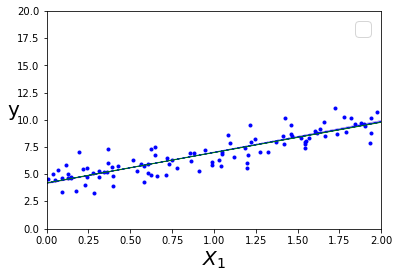

time taken: 0.539252758026123


array([[4.19490079],
       [2.78941574]])

In [61]:
import time
t0, t1 = 5,50                   # t0 and t1 are hyperparameters
m=100                           # number of rows in our dataset
def learning_rate(t):           # function defining learning rate
    return t0/(t+t1)

epochs = 100                   # number of cycles
theta = np.random.rand(2,1)    # random initialization of theta (theta0, theta1)

plt.plot(X,y, 'b.')
plt.xlabel('$X_1$', fontsize = 20)
plt.ylabel('y', rotation = 0 ,fontsize = 20)
plt.axis([0,2,0,20])
plt.legend(loc = 'upper right', fontsize = 20)

mini_x = []
mini_y = []
batch_size = 10
start = time.time()
for epoch in range(epochs):                         # number of iterations
    for i in range(m):
        random_index = np.random.randint(m)         # random value of index m signifies the end of range
        xi = X_b[random_index:random_index+batch_size]       # random X values from dataset
        yi = y[random_index:random_index+batch_size]         
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)     
        eta = learning_rate(epoch*m+i) 
        theta = theta - eta * gradients
    
    style = "b-" if epoch >0 else 'r--'    
    y_ = X_new_b.dot(theta)
    plt.plot(X_new, y_, style, linewidth = 0.1)
    mini_x.append(theta[0])
    mini_y.append(theta[1])
    
plt.plot(X_new, y_, 'g-', linewidth = 1)
plt.show()
print("time taken:", time.time()-start)
theta

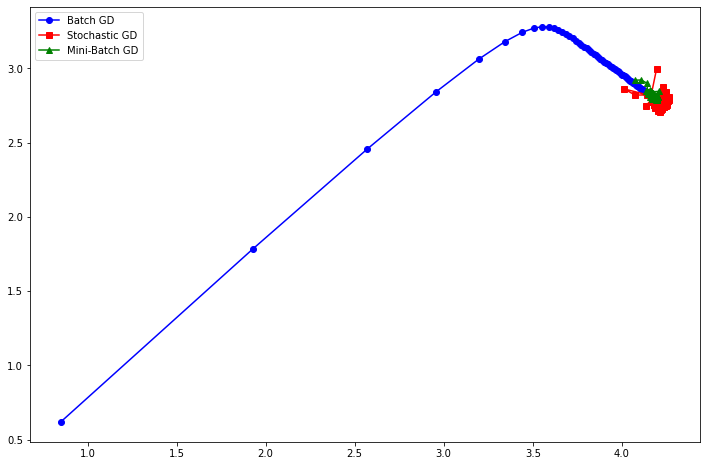

In [64]:
plt.figure(figsize = (12,8))
plt.plot(batch_gd_x, batch_gd_y ,'b-', marker = 'o', label = 'Batch GD')
plt.plot(stochastic_gd_x,stochastic_gd_y, 'r-', marker = 's', label = 'Stochastic GD')
plt.plot(mini_x,mini_y,'g-', marker = '^', label = 'Mini-Batch GD')
plt.legend()
plt.show()

# Ploynomial Regression

## What is polynomial regression when our Data is not linear or linear model is having too much error

In [71]:
# lets take an example of a quadratic equation

x = 6 * np.random.rand(100,1) -3

In [78]:
y = .5 * x**2 + x + 2 + np.random.rand(100,1)

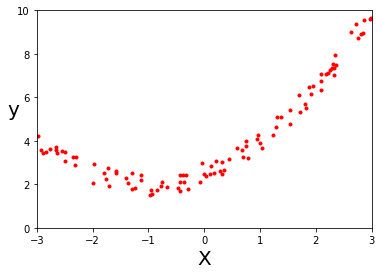

In [80]:
plt.plot(x,y,'r.')
plt.axis([-3,3,0,10])
plt.xlabel('X', fontsize = 20)
plt.ylabel('y', rotation = 0, fontsize = 20)
plt.show()

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
ploy_features = PolynomialFeatures(degree = 2, include_bias= False)
x_poly = ploy_features.fit_transform(x)

In [86]:
x[0]

array([1.27630802])

In [88]:
x_poly[0]

array([1.27630802, 1.62896216])

In [114]:
lin_reg_sq = lin_reg.fit(x_poly,y)

In [115]:
lin_reg_sq.intercept_, lin_reg_sq.coef_

(array([-1.90335355]), array([[ 7.39988663, -2.09981809]]))

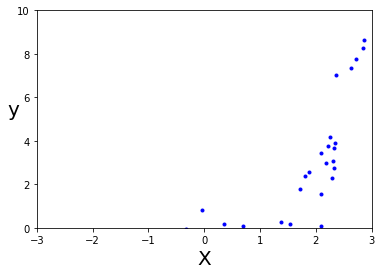

In [122]:
y_pred = lin_reg_sq.predict(x)

# Solving cubical Equation woth linear regession

In [105]:
y = 1.2 * x**3 - 2*x**2 + .6 * x - 5 + np.random.rand(100,1) * 6

In [106]:
ploy_cube = PolynomialFeatures(degree = 3, include_bias= False)
x_cube = ploy_cube.fit_transform(x)

In [107]:
x[0]

array([1.27630802])

In [108]:
x_cube[0]

array([1.27630802, 1.62896216, 2.07905746])

In [109]:
lin_reg_cube = lin_reg.fit(x_cube,y)

In [110]:
lin_reg_cube.intercept_, lin_reg_cube.coef_

(array([-1.88052476]), array([[ 0.94681841, -2.06515169,  1.14408238]]))